<a href="https://colab.research.google.com/github/alixintong/btt-ai-know-your-customer/blob/han/know_your_customer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this cell allows access to our folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# cell for imports - add as needed
import torch 
import cv2
import numpy as np 
import pandas as pd
import os, os.path
from fastai.vision.all import *

### Bash commands to change directory

In [3]:
%cd /content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames

/content/drive/.shortcut-targets-by-id/17C-FeV89lWfoxThc1mu8REz8adMDfNfP/BTTAI_AmericanExpress1/datasets/sampleDataset/frames


In [ ]:
%ls 

datasheet001_combined/       datasheet001.gt.han.csv     magazine001_frames/
datasheet001_frames/         datasheet001.gt.han.gsheet
datasheet001_frames_no_doc/  letter001_frames/


### Extract frames from the 3 videos in Smart Doc 2015 challenge 1 smaple dataset.

In [ ]:
# # first capture the frames as images
# # refer to https://stackoverflow.com/questions/33311153/python-extracting-and-saving-video-frames

# """
# sampleDataset
# - frames
#   - datasheet001_frames
#   - letter001_frames
#   - magazine001_frames

# """

# # set-up: create folders
# directory = 'frames'
# path = os.path.join(root_path, 'datasets/sampleDataset') 
# #print(os.getcwd())
# os.chdir(path)
# os.mkdir(directory)
# path = os.path.join(path, directory) # go into the frames folder
# path1 = os.path.join(path, 'datasheet001_frames')
# os.mkdir(path1)
# path2 = os.path.join(path, 'letter001_frames')
# os.mkdir(path2)
# path3 = os.path.join(path, 'magazine001_frames')
# os.mkdir(path3)

# # create path to get videos and path to put output
# vid_path = root_path + '/datasets/sampleDataset/input_sample/background00'
# frame_path = path

In [ ]:
"""
# create frames for datasheet001_frames first
#directory1 = os.path.join(root_path, 'datasets', 'sampleDataset', 'input_sample', 'background00')
os.chdir('/content/drive/MyDrive/AI_studio_Fall22/BTTAI_AmericanExpress1/datasets/sampleDataset/input_sample/background00')
print(os.getcwd())
vidcap = cv2.VideoCapture('datasheet001.avi')
success,image = vidcap.read()

# change the directory to 'datasheet001_frames' folder
#os.chdir(root_path)
#directory2 = os.path.join(root_path, 'datasets', 'sampleDataset', 'frames', 'datasheet001_frames')
os.chdir('/content/drive/MyDrive/AI_studio_Fall22/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/datasheet001_frames')
print(os.getcwd())

# create frames
count = 1
while success:
 cv2.imwrite('datasheet001_frames_' + '{:05d}'.format(count) + '.jpg', image)     # save frame as JPEG file      
 success,image = vidcap.read()
 print('Read a new frame: ', success)
 count += 1
"""

"\n# create frames for datasheet001_frames first\n#directory1 = os.path.join(root_path, 'datasets', 'sampleDataset', 'input_sample', 'background00')\nos.chdir('/content/drive/MyDrive/AI_studio_Fall22/BTTAI_AmericanExpress1/datasets/sampleDataset/input_sample/background00')\nprint(os.getcwd())\nvidcap = cv2.VideoCapture('datasheet001.avi')\nsuccess,image = vidcap.read()\n\n# change the directory to 'datasheet001_frames' folder\n#os.chdir(root_path)\n#directory2 = os.path.join(root_path, 'datasets', 'sampleDataset', 'frames', 'datasheet001_frames')\nos.chdir('/content/drive/MyDrive/AI_studio_Fall22/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/datasheet001_frames')\nprint(os.getcwd())\n\n# create frames\ncount = 1\nwhile success:\n cv2.imwrite('datasheet001_frames_' + '{:05d}'.format(count) + '.jpg', image)     # save frame as JPEG file      \n success,image = vidcap.read()\n print('Read a new frame: ', success)\n count += 1\n"

In [ ]:
"""
# create frames for letter001_frames
os.chdir('/content/drive/MyDrive/AI_studio_Fall22/BTTAI_AmericanExpress1/datasets/sampleDataset/input_sample/background00')
print(os.getcwd())
vidcap = cv2.VideoCapture('letter001.avi')
success,image = vidcap.read()

# change the directory to 'letter001_frames' folder
os.chdir('/content/drive/MyDrive/AI_studio_Fall22/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_frames')
print(os.getcwd())

# create frames
count = 1
while success:
 cv2.imwrite('letter001_frames_' + '{:05d}'.format(count) + '.jpg', image)     # save frame as JPEG file      
 success,image = vidcap.read()
 print('Read a new frame: ', success)
 count += 1
"""

"\n# create frames for letter001_frames\nos.chdir('/content/drive/MyDrive/AI_studio_Fall22/BTTAI_AmericanExpress1/datasets/sampleDataset/input_sample/background00')\nprint(os.getcwd())\nvidcap = cv2.VideoCapture('letter001.avi')\nsuccess,image = vidcap.read()\n\n# change the directory to 'letter001_frames' folder\nos.chdir('/content/drive/MyDrive/AI_studio_Fall22/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_frames')\nprint(os.getcwd())\n\n# create frames\ncount = 1\nwhile success:\n cv2.imwrite('letter001_frames_' + '{:05d}'.format(count) + '.jpg', image)     # save frame as JPEG file      \n success,image = vidcap.read()\n print('Read a new frame: ', success)\n count += 1\n"

In [ ]:
"""
# create frames for magazine001_frames
os.chdir('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/input_sample/background00')
print(os.getcwd())
vidcap = cv2.VideoCapture('magazine001.avi')
success,image = vidcap.read()
# change the directory to 'magazine001_frames' folder
os.chdir('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/magazine001_frames')
print(os.getcwd())

# create frames
count = 1
success = True
while success:
  cv2.imwrite('magazine001_frames_' + '{:05d}'.format(count) + '.jpg', image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1
"""

"\n# create frames for magazine001_frames\nos.chdir('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/input_sample/background00')\nprint(os.getcwd())\nvidcap = cv2.VideoCapture('magazine001.avi')\nsuccess,image = vidcap.read()\n# change the directory to 'magazine001_frames' folder\nos.chdir('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/magazine001_frames')\nprint(os.getcwd())\n\n# create frames\ncount = 1\nsuccess = True\nwhile success:\n  cv2.imwrite('magazine001_frames_' + '{:05d}'.format(count) + '.jpg', image)     # save frame as JPEG file      \n  success,image = vidcap.read()\n  print('Read a new frame: ', success)\n  count += 1\n"

In [ ]:
# reference tutorial for classification: https://docs.fast.ai/23_tutorial.vision.html

### Git commands

In [ ]:
%cd /content/drive/MyDrive/AI_studio_Fall22/btt-ai-know-your-customer/

/content/drive/MyDrive/AI_studio_Fall22/btt-ai-know-your-customer


In [ ]:
%ls -a

.git/  know_your_customer.ipynb  README.md


In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   know_your_customer.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


### EDA

In [4]:
files = get_image_files(os.getcwd())

In [5]:
len(files)

2352

In [6]:
files[0],files[6],files[587]

(Path('/content/drive/.shortcut-targets-by-id/17C-FeV89lWfoxThc1mu8REz8adMDfNfP/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_frames/letter001_frames_00001.jpg'),
 Path('/content/drive/.shortcut-targets-by-id/17C-FeV89lWfoxThc1mu8REz8adMDfNfP/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_frames/letter001_frames_00007.jpg'),
 Path('/content/drive/.shortcut-targets-by-id/17C-FeV89lWfoxThc1mu8REz8adMDfNfP/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/datasheet001_frames/datasheet001_frames_00214.jpg'))

### Generate additional images that do not contain documents

In [ ]:
# print the dimension of an output frame
# img = cv2.imread('datasheet001_frames/datasheet001_frames_00214.jpg')
# dimensions = img.shape
# print(dimensions)

In [ ]:
# use RandomCrop() in fastai
# img1 = img.RandomCrop((1080,1920,3))


2nd attempt: The fast ai random crop is not the best tool to use...In this section, Im going to try to "crop" in for loop using the Pillow Image Library. 



In [7]:
from PIL import Image
import PIL 
import cv2
import re

In [ ]:
url='https://drive.google.com/file/d/1qh5N-hOVmWtcb5mEBB7mlh4AsdxbQfOA/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,point/0/_name,point/0/_x,point/0/_y,point/1/_name,point/1/_x,point/1/_y,point/2/_name,point/2/_x,point/2/_y,point/3/_name,point/3/_x,point/3/_y,_index,_rejected
0,bl,716.625,805.609,tl,737.377,201.383,tr,1180.71,199.127,br,1259.02,791.942,1,False
1,bl,714.326,806.309,tl,736.330,202.300,tr,1179.74,200.028,br,1257.21,792.161,2,False
2,bl,713.031,804.811,tl,734.431,201.449,tr,1177.81,199.795,br,1255.42,791.291,3,False
3,bl,713.845,802.659,tl,734.423,198.474,tr,1177.79,196.852,br,1256.72,789.631,4,False
4,bl,713.088,802.830,tl,734.675,195.678,tr,1179.99,194.057,br,1259.35,790.289,5,False


In [ ]:
print("top-left:", df['point/1/_x'][0], df['point/1/_y'][0])
print("bottom-right:", df['point/3/_x'][0], df['point/3/_y'][0])

top-left: 737.377 201.383
bottom-right: 1259.02 791.942


In [ ]:
#before adding the cropped image in...
# I need to change directories using OS.
# Without doing this, it will result in an error.

#using previous implementation 

# create frames for datasheet001_frames first
#directory1 = os.path.join(root_path, 'datasets', 'sampleDataset', 'input_sample', 'background00')
os.chdir('/content/drive/MyDrive/AI_studio_Fall22/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/')
print(os.getcwd())



In [ ]:
# Note: (image size: 1920 x 1080 pixels)
# The crop function takes in: ((top-left, bottom-right))

In [ ]:
ds_img_number = 1 
while ds_img_number <= 214:
  number = ("%05d" % ds_img_number)
  img_str = ("datasheet001_frames/datasheet001_frames_%s.jpg" % (number))
  img = Image.open(img_str)
  img2 = img.crop((0, 0,  df['point/0/_x'][ds_img_number-1], df['point/0/_y'][ds_img_number-1])) #subtracting 1 because the cvs table starts at 0 
  img2.save(("/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/datasheet001_frames_no_doc/Datasheet001_frames_no_doc_%s.jpg")% (number))
  ds_img_number+=1


### Build a model to classify images into documents & non-documents.

In [7]:
import re

In [8]:
# use datasheet001 as csv instead of xml
# using Han's XML with the manually values into the groundtruth
url='https://drive.google.com/file/d/17CcTQHts6U_L4YUgsyEfTao974K8ioWu/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,point/0/_name,point/0/_x,point/0/_y,point/1/_name,point/1/_x,point/1/_y,point/2/_name,point/2/_x,point/2/_y,point/3/_name,point/3/_x,point/3/_y,_index,_rejected
0,bl,716.625,805.609,tl,737.377,201.383,tr,1180.71,199.127,br,1259.02,791.942,1,False
1,bl,714.326,806.309,tl,736.330,202.300,tr,1179.74,200.028,br,1257.21,792.161,2,False
2,bl,713.031,804.811,tl,734.431,201.449,tr,1177.81,199.795,br,1255.42,791.291,3,False
3,bl,713.845,802.659,tl,734.423,198.474,tr,1177.79,196.852,br,1256.72,789.631,4,False
4,bl,713.088,802.830,tl,734.675,195.678,tr,1179.99,194.057,br,1259.35,790.289,5,False


In [9]:
# save _rejected column for binary classification

path = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames'

files = get_image_files(path + "/datasheet001_combined")

df["document"] = df["_rejected"].apply(lambda x: not x) 
bin_doc = df['document']

In [10]:
df.head()

,point/0/_name,point/0/_x,point/0/_y,point/1/_name,point/1/_x,point/1/_y,point/2/_name,point/2/_x,point/2/_y,point/3/_name,point/3/_x,point/3/_y,_index,_rejected,document
0,bl,716.625,805.609,tl,737.377,201.383,tr,1180.71,199.127,br,1259.02,791.942,1,False,True
1,bl,714.326,806.309,tl,736.330,202.300,tr,1179.74,200.028,br,1257.21,792.161,2,False,True
2,bl,713.031,804.811,tl,734.431,201.449,tr,1177.81,199.795,br,1255.42,791.291,3,False,True
3,bl,713.845,802.659,tl,734.423,198.474,tr,1177.79,196.852,br,1256.72,789.631,4,False,True
4,bl,713.088,802.830,tl,734.675,195.678,tr,1179.99,194.057,br,1259.35,790.289,5,False,True


In [11]:
files[0],files[214],files[427]

(Path('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/datasheet001_combined/datasheet001_frames_00026.jpg'),
 Path('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/datasheet001_combined/Datasheet001_frames_no_doc_00001.jpg'),
 Path('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/datasheet001_combined/Datasheet001_frames_no_doc_00214.jpg'))

In [12]:
bin_doc.tail()

423    False
424    False
425    False
426    False
427    False
Name: document, dtype: bool

In [ ]:
# label function
# def label_func(f):
#   frame_num = f.split('.jpg')[0]
#   frame_num = int(re.findall('[1-9]+', f)[1])
#   rowNum = frame_num-1
#   return bin_doc.loc[rowNum]

In [13]:
'''
The new labeling: 
The photos are labeled with: 
- lowercase has documents (_rejected = False) 
- Uppercase contains NO documents (_rejected = True)
'''

def label_func(f):
  return f[0].isupper()


In [14]:
# DataLoader object
# Stuck on: 'KeyError: '00163''
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

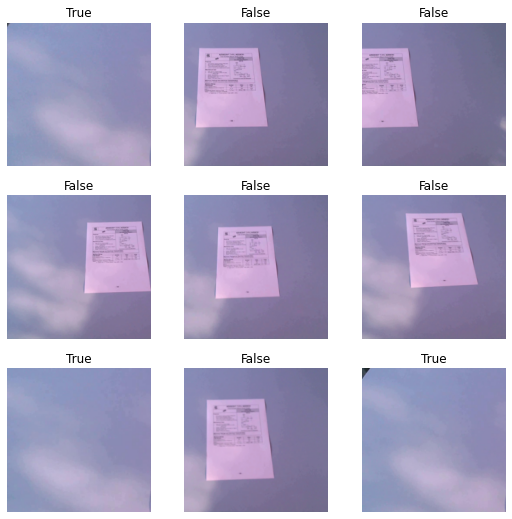

In [15]:
dls.show_batch()

In [16]:
# Create Learner with pretrained ResNet34
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.849938,0.041010,0.000000,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.002893,0.003592,0.000000,00:11


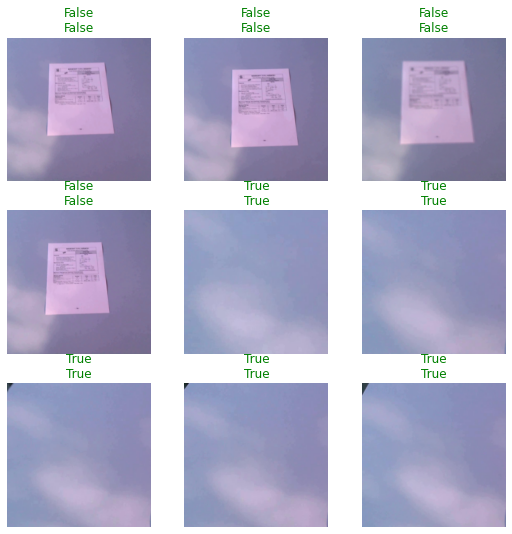

In [17]:
learn.show_results()